# II. Pandas

Pandas (Panel data) - це широко поширена бібліотека мовою Python з відкритим вихідним кодом для обробки і аналізу даних. На відміну від основної структури даних бібліотеки NumPy, головний об'єкт pandas DataFrame може містити неоднорідні типи даних (числа з плаваючою комою, цілі числа, рядки, дати тощо), які можна структурувати у вигляді ієрархії та індексувати.

Бібліотека pandas надає дві структури для роботи з даними: 
- Series
- DataFrame

Series - це маркована одновимірна структура даних, її можна уявити, як таблицю з одним рядком (або стовпцем). З Series можна працювати як із звичайним масивом (звертатися за номером індексу), і як із асоційованим масивом, у цьому випадку можна використовувати ключ для доступу до елементів даних.

DataFrame - це двовимірна маркована структура. Вона схожа на звичайну таблицю і це виявляється у способі її створення та у роботі з її елементами.

Pandas важливий для обробки даних, оскільки він надає широкий спектр інструментів для ефективної роботи з даними, включаючи завантаження, очищення, трансформацію, візуалізацію та аналіз даних.

In [57]:
#pip install pandas

In [58]:
import pandas as pd

In [59]:
mountains_height = pd.Series([2061, 2035.8, 2028.5, 2022.5, 2016.4])  # У найпростішій формі об'єкт Series можна створити так само як одновимірний масив NumPy:
print(mountains_height)

0    2061.0
1    2035.8
2    2028.5
3    2022.5
4    2016.4
dtype: float64


In [72]:
mountains_height = pd.Series(
    data=[2061, 2035.8, 2028.5, 2022.5, 2016.4], # data - дані, які будуть зберігатися в об'єкті Series
    index=["Goverla", "Brebenskyl", "Pip_Ivan", "Petros", "Gutin_Tomnatik"], # index - індекси, які будуть використовуватися для доступу до елементів об'єкту Series
    name="Height, m", # name - назва об'єкту Series
    dtype=float, # dtype - тип даних, які будуть зберігатися в об'єкті Series
)

print(mountains_height)

Goverla           2061.0
Brebenskyl        2035.8
Pip_Ivan          2028.5
Petros            2022.5
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64


In [61]:
print(mountains_height[0])  # 2061.0

2061.0


/var/folders/1_/srzbzbl92_g30dskrrsvt1d80000gn/T/ipykernel_16151/3135198039.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(mountains_height[0])  # 2061.0


In [62]:
print(mountains_height["Goverla"])  # 2061.0

2061.0


In [63]:
print(mountains_height[["Pip_Ivan", "Goverla", "Gutin_Tomnatik"]])

Pip_Ivan          2028.5
Goverla           2061.0
Gutin_Tomnatik    2016.4
Name: Height, m, dtype: float64


In [64]:
# Вирізання елементів у стилі Python працює.

print(mountains_height[1:3]) # не включно 3!

Brebenskyl    2035.8
Pip_Ivan      2028.5
Name: Height, m, dtype: float64


In [65]:
print(mountains_height["Brebenskyl":"Petros"])

Brebenskyl    2035.8
Pip_Ivan      2028.5
Petros        2022.5
Name: Height, m, dtype: float64


In [66]:
# Можна звертатися до рядку даних як до атрибуту послідовності Series:

print(mountains_height.Petros)  # 2022.5
print(mountains_height.Brebenskyl)  # 2035.8

2022.5
2035.8


In [25]:
# Операції порівняння та фільтрації об'єкта Series за допомогою логічних операцій створюють новий об'єкт Series

print(mountains_height > 2030) # повертає об'єкт Series з логічними значеннями


Goverla            True
Brebenskyl         True
Pip_Ivan          False
Petros            False
Gutin_Tomnatik    False
Name: Height, m, dtype: bool


Goverla       2061.0
Brebenskyl    2035.8
Name: Height, m, dtype: float64


In [68]:
print(mountains_height[mountains_height > 2030])  # повертає об'єкт Series з елементами, які задовольняють умову

Goverla       2061.0
Brebenskyl    2035.8
Name: Height, m, dtype: float64


In [69]:
# Операції перевірки на існування елемента в Series використовують індекс, а не значення:

print("Goverla" in mountains_height)  # True

True


# Sorting

In [26]:
sort_index = mountains_height.sort_index()
print(sort_index)

Brebenskyl        2035.8
Goverla           2061.0
Gutin_Tomnatik    2016.4
Petros            2022.5
Pip_Ivan          2028.5
Name: Height, m, dtype: float64


In [28]:
mountains_height.sort_values(inplace=True, ascending=True) # inplace=True - змінює об'єкт Series, а не повертає новий 
print(mountains_height)

Gutin_Tomnatik    2016.4
Petros            2022.5
Pip_Ivan          2028.5
Brebenskyl        2035.8
Goverla           2061.0
Name: Height, m, dtype: float64


In [71]:
# Метод apply дозволяє застосовувати користувацьку функцію до кожного елемента Series.

def square(x):
    return x**2


squared_height = mountains_height.apply(square)
print(squared_height)

Goverla           4247721.00
Brebenskyl        4144481.64
Pip_Ivan          4114812.25
Petros            4090506.25
Gutin_Tomnatik    4065868.96
Name: Height, m, dtype: float64


In [32]:
#pip install matplotlib

<Axes: >

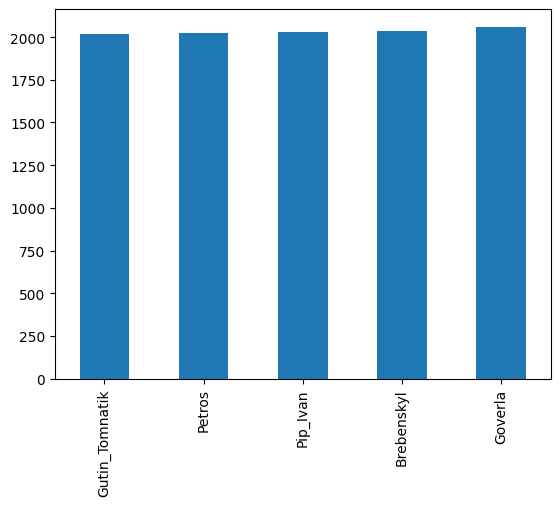

In [33]:
# Також Pandas пропонує простий спосіб візуалізації даних в Series.

mountains_height.plot(kind='bar')

In [34]:
# Останнім розглянемо метод concat який дозволяє з'єднувати два або більше об'єктів Series в один.

other_mountains = pd.Series([2001.1, 1998.4], index=["Rebra", "Menchul"])
all_mountains = pd.concat([mountains_height, other_mountains])
print(all_mountains)

Gutin_Tomnatik    2016.4
Petros            2022.5
Pip_Ivan          2028.5
Brebenskyl        2035.8
Goverla           2061.0
Rebra             2001.1
Menchul           1998.4
dtype: float64


# Об'єкт DataFrame

In [35]:
# Об'єкт DataFrame є основним компонентом бібліотеки Pandas і являє собою двовимірну структуру даних зі стовпцями різних типів.
# Це один з найзручніших інструментів для обробки та аналізу табличних даних у Python.

In [ ]:
# Створення DataFrame можливо зі списків

import pandas as pd

data = [[1, "Alice"], [2, "Bob"]]
df = pd.DataFrame(data, columns=["ID", "Name"])

In [36]:
# Зі словників

data = {'ID': [1, 2], 'Name': ['Alice', 'Bob']}
df = pd.DataFrame(data)

In [37]:
# З NumPy масивів

import numpy as np

data = np.array([[1, "Alice"], [2, "Bob"]])
df = pd.DataFrame(data, columns=["ID", "Name"])

## Властивості DataFrame​



DataFrame має наступні властивості:

- shape: повертає розмір DataFrame (кількість рядків, кількість стовпців).
- columns: повертає назви стовпців.
- index: повертає індекси рядків.
- dtypes: повертає типи даних кожного стовпця.

In [74]:
import pandas as pd

# Створення даних у формі словника, де ключі - це назви колонок, а значення - списки даних для цих колонок
data = {"Student ID": [101, 102, 103], "Score": [85, 90, 78]}

# Створення DataFrame з використанням цього словника
df = pd.DataFrame(data)

# Виводимо DataFrame
print(df)

   Student ID  Score
0         101     85
1         102     90
2         103     78


In [87]:
# https://www.kaggle.com/datasets/heptapod/titanic
df = pd.read_csv('/Users/marinalysenko/Projects/goit_da_6/goit_da_6/module_4_python/train_and_test2.csv')
df

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [88]:
# https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset?resource=download

# pip install openpyxl
df = pd.read_excel(
    "/Users/marinalysenko/Projects/goit_da_6/goit_da_6/module_4_python/Telco_customer_churn.xlsx"
)
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [89]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [91]:
df.head(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved


In [92]:
df.tail(3)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,38,5097,NaN


In [93]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [94]:
df.shape

(7043, 33)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [96]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [97]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [101]:
dfr = df.rename(columns={"CustomerID": "ClientID"})
dfr.columns

Index(['ClientID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long',
       'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV',
       'Churn Reason'],
      dtype='object')

In [102]:
df.drop("Zip Code", axis=1) # axis=1 - видаляє колонку, axis=0 - видаляє рядок

,CustomerID,Count,Country,State,City,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,"34.341737, -116.539416",34.341737,-116.539416,Female,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,"34.667815, -117.536183",34.667815,-117.536183,Male,No,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,"34.559882, -115.637164",34.559882,-115.637164,Female,No,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,"34.1678, -116.86433",34.167800,-116.864330,Female,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [103]:
df.reset_index()

,index,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


## Що робимо з рядками?

In [ ]:
#df.reset_index(drop=True, inplace=True) # drop=True - видаляє колонку з індексами, inplace=True - змінює об'єкт DataFrame, а не повертає новий

In [105]:
df.set_index("CustomerID")

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN


In [106]:
type(df["Country"])

pandas.core.series.Series

In [108]:
df["State"].unique()

array(['California'], dtype=object)

In [112]:
df["Charge_ind"] = df["Monthly Charges"] * df["Churn Score"]

In [113]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Charge_ind
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,4631.10
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,4736.90
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,8569.90
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,8803.20
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,9229.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN,951.75
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN,5003.20
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN,7327.20
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN,1746.40


In [114]:
df.isnull()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Charge_ind
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [115]:
df.isnull().sum()   

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
Charge_ind              0
dtype: int64

In [116]:
df['Total Charges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Total Charges
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [127]:
df["Total Charges"]

0        108.15
1        151.65
2        820.50
3       3046.05
4       5036.30
         ...   
7038    1419.40
7039    1990.50
7040    7362.90
7041     346.45
7042    6844.50
Name: Total Charges, Length: 7043, dtype: float64

In [126]:
df["Total Charges"] = df["Total Charges"].astype(float)

In [125]:
df = df.fillna(0)

In [124]:
# df замінити '' на 0
df = df.replace(" ", 0)

In [ ]:
df.shape

In [ ]:
# видалити рядки з пропущеними значеннями
df = df.dropna()

In [ ]:
df.shape

In [ ]:
# замінити значення в колонці Total Charges на середнє значення
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].mean())